In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(pd.__version__)

2.0.3


In [5]:
# Data import
df = sns.load_dataset("titanic")

In [100]:
# Step - 1 Composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [70]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [71]:
df.tail()

survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male deck  embark_town alive  alone  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True

In [72]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [73]:
df.survived.unique()

array([0, 1], dtype=int64)

In [74]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [75]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [76]:
df.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [78]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [79]:
df.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [80]:
df.adult_male.value_counts()

True     537
False    354
Name: adult_male, dtype: int64

In [81]:
df.age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

# Making a new column based on Age:
    0 - 5
    6 - 12
    13 - 18
    18 - 40
    Greater then 40

In [119]:
max(df["age"])

80.0

In [168]:
# create bins edges
bins = [0,5,10,15,18,40,80]
labels = ['0-5', '6-10', '11-15','16-18', '18-40', '41-80' ]
# add new column
df["age_groups"] = pd.cut(df["age"], bins=bins, labels=labels)
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone age_groups  
0    man        True  Southampton    no  False      18-40  
1  woman       False    Cherbourg   yes  False      18-40  
2  woman       False  Southampton   yes   True      18-40  
3  woman       False  Southampton   yes  False      18-40  
4    man        True  Southampton    no   True      18-40

In [34]:
df.tail()

survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male deck  embark_town alive  alone age_groups  
886    man        True  NaN  Southampton    no   True      18-40  
887  woman       False    B  Southampton   yes   True      18-40  
888  woman       False  NaN  Southampton    no  False        NaN  
889    man        True    C    Cherbourg   yes   True      18-40  
890    man        True  NaN   Queenstown    no   True      18-40

In [84]:
df.age_groups.value_counts()

18-40    425
41-80    150
16-18     56
0-5       44
6-10      20
11-15     19
Name: age_groups, dtype: int64

In [36]:
df.groupby('sex')['age_groups'].value_counts().unstack()

0-5  6-10  11-15  16-18  18-40  41-80
sex                                          
female   21    10     12     25    145     48
male     23    10      7     31    280    102

In [37]:
df.groupby('who')['age_groups'].value_counts().unstack()

0-5  6-10  11-15  16-18  18-40  41-80
who                                         
child   44    20     19      0      0      0
man      0     0      0     31    280    102
woman    0     0      0     25    145     48

In [85]:
# Finding the max age where who is child (Perform slicing)
df[df['who']=="child"]["age"].max()

15.0

In [39]:
# Finding the min age where who is child (Perform slicing)
df[df['who']=="child"]["age"].min()

0.42

In [40]:
df.groupby('who')["class"].value_counts().unstack()

First  Second  Third
who                        
child      6      19     58
man      119      99    319
woman     91      66    114

In [2]:
df.groupby('who')['age_groups', "class"].value_counts().unstack()

NameError: name 'df' is not defined

In [42]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'age_groups'],
      dtype='object')

<Axes: xlabel='age', ylabel='fare'>

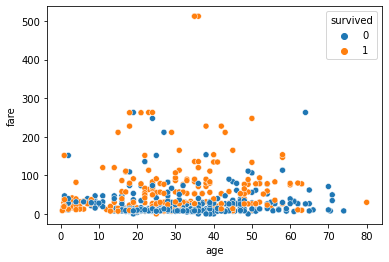

In [48]:
sns.scatterplot(data=df,x='age', y='fare', hue="survived")

<Axes: xlabel='age', ylabel='fare'>

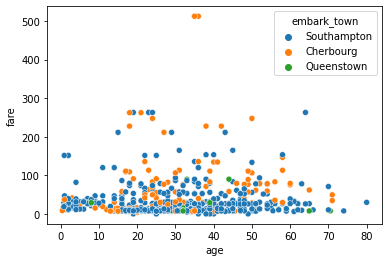

In [52]:
sns.scatterplot(data=df,x='age', y='fare', hue="embark_town")

In [54]:
import plotly.express as px
fig = px.scatter(df, x="age", y="fare")
fig.show()

In [57]:
import plotly.express as px
fig = px.scatter(df, x="age", y="fare", color='who')
fig.show()

In [58]:
fig = px.bar(df, x="survived", y="fare", color='who')
fig.show()

In [59]:
fig = px.box(df, x="survived", y="fare", color='who')
fig.show()

C:\Python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



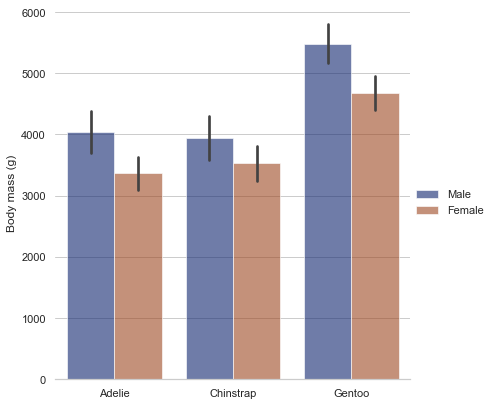

In [60]:
sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [61]:
import plotly.graph_objects as go

import pandas as pd

# Get Data: this ex will only use part of it (i.e. rows 750-1500)
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv')

start, end = 750, 1500

fig = go.Figure(data=go.Scatter3d(
    x=df['year'][start:end],
    y=df['continent'][start:end],
    z=df['pop'][start:end],
    text=df['country'][start:end],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=750,
        size=df['gdpPercap'][start:end],
        color = df['lifeExp'][start:end],
        colorscale = 'Viridis',
        colorbar_title = 'Life<br>Expectancy',
        line_color='rgb(140, 140, 170)'
    )
))


fig.update_layout(height=800, width=800,
                  title='Examining Population and Life Expectancy Over Time')

fig.show()

<Axes: xlabel='age_groups', ylabel='count'>

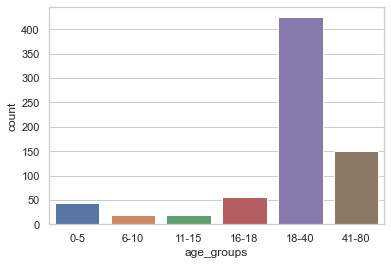

In [86]:
sns.countplot(df, x='age_groups')

<Axes: xlabel='age', ylabel='Count'>

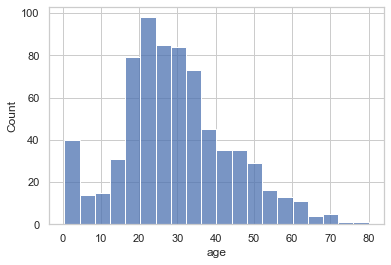

In [91]:
# Distribution
sns.histplot(df,x='age')

<Axes: xlabel='fare', ylabel='Count'>

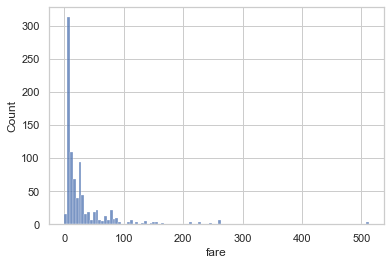

In [92]:
sns.histplot(df,x='fare')

<Axes: xlabel='age', ylabel='Count'>

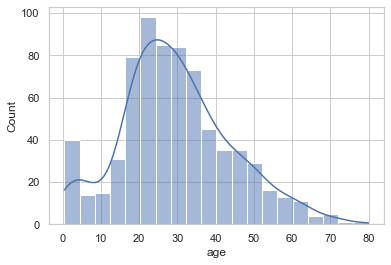

In [94]:
sns.histplot(df,x='age', kde=True)

In [116]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [167]:
# shapiro wilk test - for make sure data is normalise
from scipy.stats import shapiro
age_data = df['age'].dropna()
stat,p =shapiro(age_data)
print("statistics:", stat)
print("p_value:", p)

#interpretation

alpha = 0.05
if p > alpha:
    print("sample looks normally distributed (Gaussian distribution is correct)")
else:
    print("sample does not have Gaussian distribution")


statistics: 0.981458306312561
p_value: 7.340329943872348e-08
sample does not have Gaussian distribution


In [133]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone age_groups  
0    man        True  NaN  Southampton    no  False      18-40  
1  woman       False    C    Cherbourg   yes  False      18-40  
2  woman       False  NaN  Southampton   yes   True      18-40  
3  woman       False    C  Southampton   yes  False      18-40  
4    man        True  NaN  Southampton    no   True      18-40

<__array_function__ internals>:200: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:200: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

C:\Python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



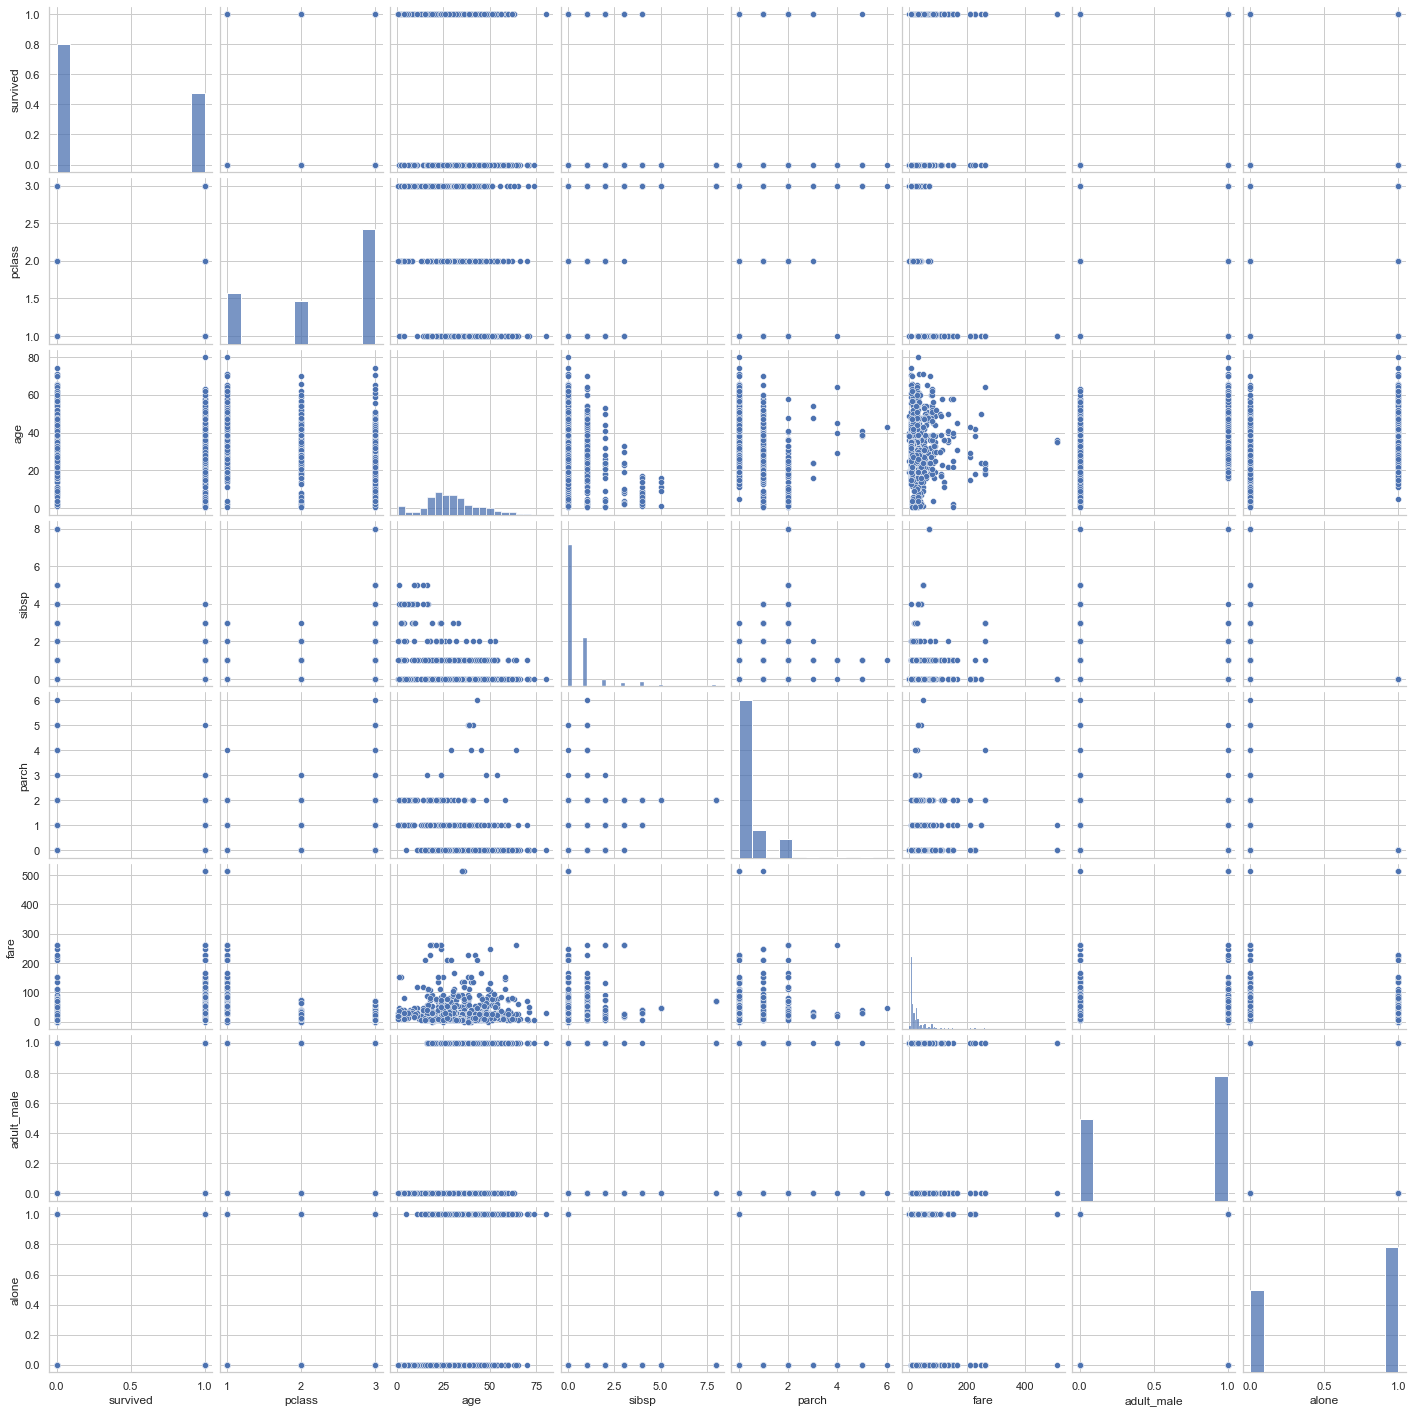

In [134]:
# Multivariate Analysis
sns.pairplot(df)

C:\Python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



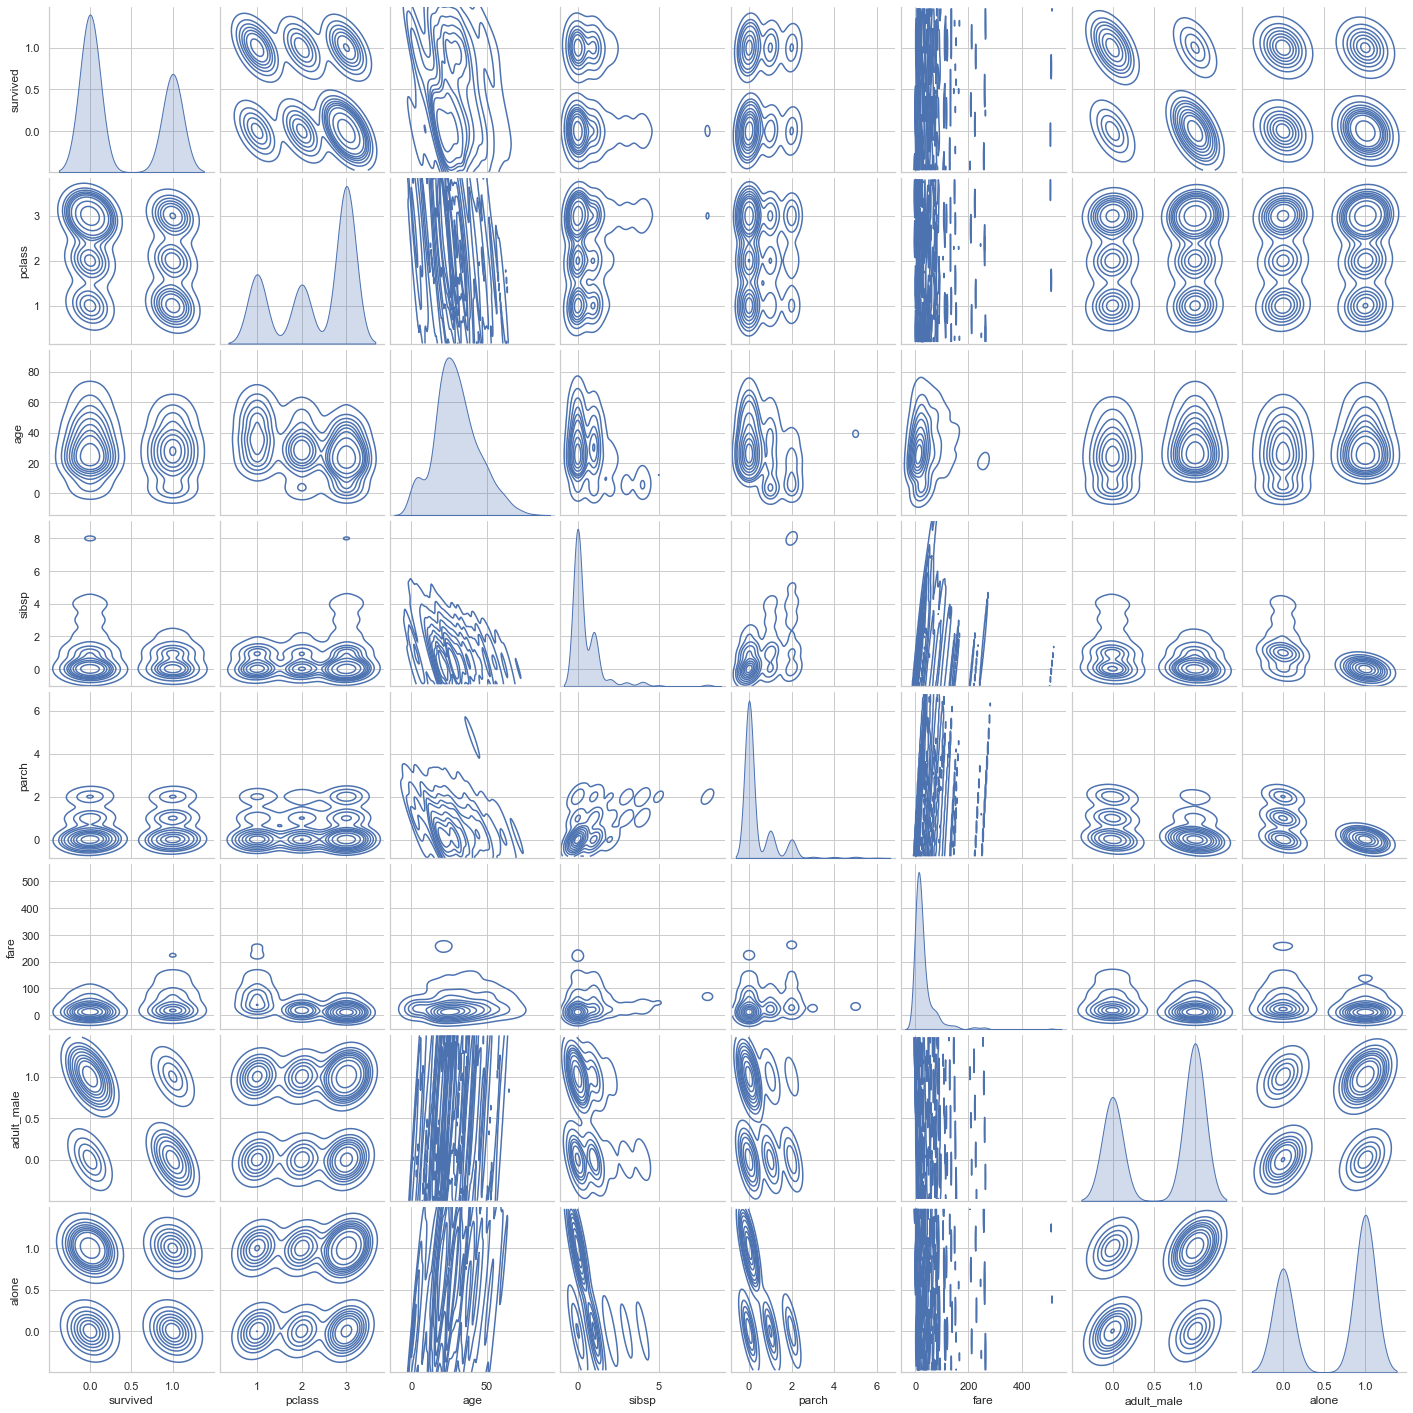

In [136]:
# Multivariate Analysis
sns.pairplot(df, kind="kde")

<Axes: >

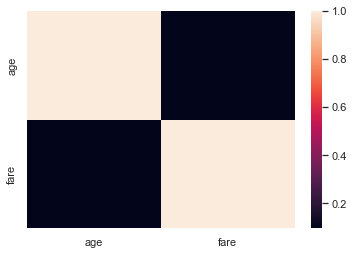

In [137]:
# correaltion Matrix - only for numeric variables 
corr = df[['age', "fare"]].corr()
sns.heatmap(corr)

In [138]:
corr = df[['age', "fare"]].corr()
corr

age      fare
age   1.000000  0.096067
fare  0.096067  1.000000

# Impute Null values in Python

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset("titanic")
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [142]:
# find the null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [143]:
# find the null values
df.isnull().sum() / len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [169]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'age_groups'],
      dtype='object')

In [11]:
df.drop(columns='deck', axis=1, inplace=True)


In [156]:
pip install --upgrade pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/9a/f2/0ad053856debbe90c83de1b4f05915f85fd2146f20faf9daa3b320d36df3/pandas-2.0.3-cp39-cp39-win_amd64.whl.metadata
     ------------------------------------ 341.8/341.8 kB 663.2 kB/s eta 0:00:00
   ---------------------------------------- 10.8/10.8 MB 1.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.1
    Uninstalling pandas-1.3.1:
      Successfully uninstalled pandas-1.3.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python\\Lib\\site-packages\\~andas\\_libs\\algos.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [172]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'age_groups'],
      dtype='object')

In [184]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
# Fill with mode
df["embark_town"].fillna(df["embark_town"].mode()[0], inplace = True)

In [8]:
df["embarked"].fillna(df["embarked"].mode()[0], inplace = True)

In [12]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# Fill NA with mean or median

In [9]:

df["age"].fillna(df["age"].mean(), inplace = True)
df["age"].fillna(df["age"].median(), inplace = True)
df["age"].fillna(df["age"].mode()[0], inplace = True)

# Replacing with constant

In [ ]:
df["age"].fillna(value = 29, inplace = True)

# Interpolation(Linear)

In [ ]:
df["age"] = (df["age"].interpolate(method="Linear"))

# KNN Imputation

In [3]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/2d/30/3afb8bcb785653254eb646ff2680ec4d637b40b06f4b046aca17b5e086b0/scikit_learn-1.3.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 9.3/9.3 MB 512.6 kB/s eta 0:00:00
   -------------------------------------- 302.2/302.2 kB 519.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install Upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement Upgrade (from versions: none)
ERROR: No matching distribution found for Upgrade


In [1]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbours=5)
df["age"] = imputer.fit_transform(df['age'])

TypeError: __init__() got an unexpected keyword argument 'n_neighbours'